In [9]:
import networkx as nx
import numpy as np

from description.kinematics import JointPoint
from description.builder import add_branch
from description.utils import draw_joint_point
pi = np.pi

Try to set the main branch

1.3700759821584223
[ 0.15861873  0.         -1.36086307]
1.0625211908454528
[-0.43299835  0.         -2.24343914]


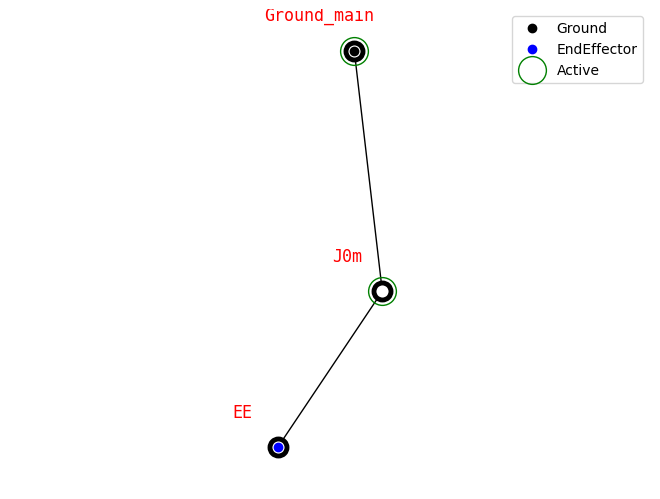

In [24]:
graph = nx.Graph()

length_constrains = (0.2, 1.4)
angle_constraints = (-pi/3, pi/3)

main_branch_links = np.random.choice([2,3,4])

ground_joint = JointPoint(r=np.zeros(3), w=np.array([0, 1, 0]), attach_ground=True, active=True, name="Ground_main")
main_branch = [ground_joint]
for i in range(main_branch_links):
    sampled_length = np.random.uniform(*length_constrains)
    print(sampled_length)
    sampled_angle = np.random.uniform(*angle_constraints)
    x = sampled_length * np.sin(sampled_angle)
    y = 0
    z = -sampled_length * np.cos(sampled_angle)
    new_coordenates = main_branch[-1].r+np.array([x,y,z])
    print(new_coordenates)
    if i!=main_branch_links-1:
        main_branch.append(JointPoint(r=new_coordenates, w=np.array([0, 1, 0]), active=True, name=f"J{i}m"))
    else:
        main_branch.append(JointPoint(r=new_coordenates, w=np.array([0, 1, 0]), attach_endeffector=True,  name=f"EE"))

add_branch(graph, [main_branch])
draw_joint_point(graph) 

In [23]:
initial_dof = main_branch_links * 3 - main_branch_links*2
initial_dof = main_branch_links

final_dof = 2


2